In [ ]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 28.7 MB/s 
     |████████████████████████████████| 604 kB 88.7 MB/s 
     |████████████████████████████████| 47.6 MB 1.5 MB/s 
     |████████████████████████████████| 145 kB 77.3 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.6.0.66
    Uninstalling opencv-python-headless-4.6.0.66:
      Successfully uninstalled opencv-python-headless-4.6.0.66


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


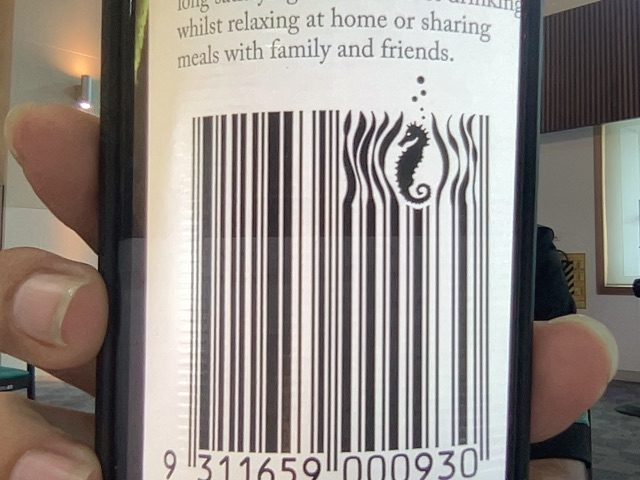

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
from google.colab.patches import cv2_imshow

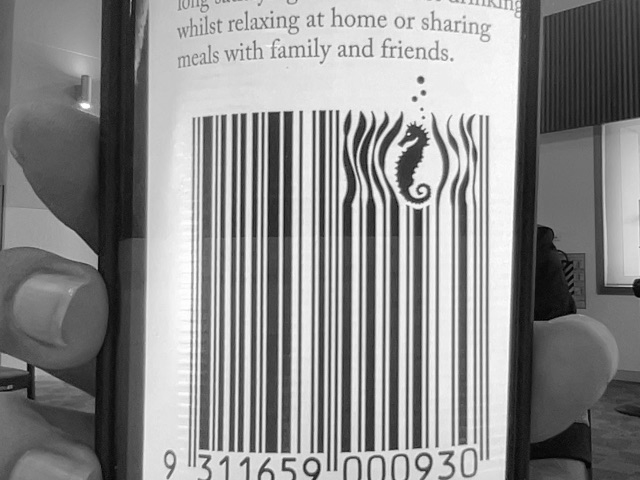

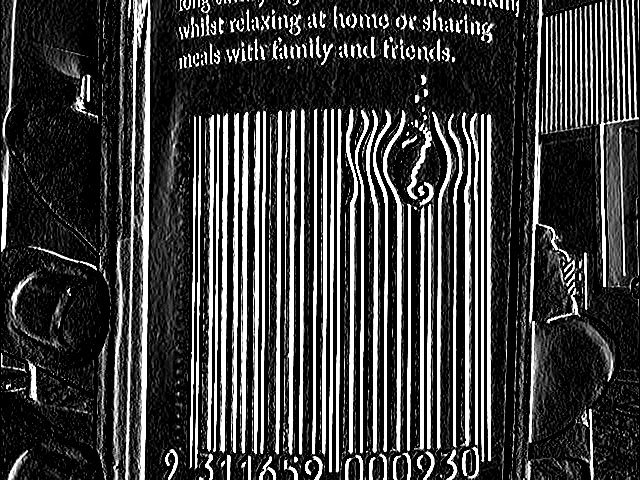

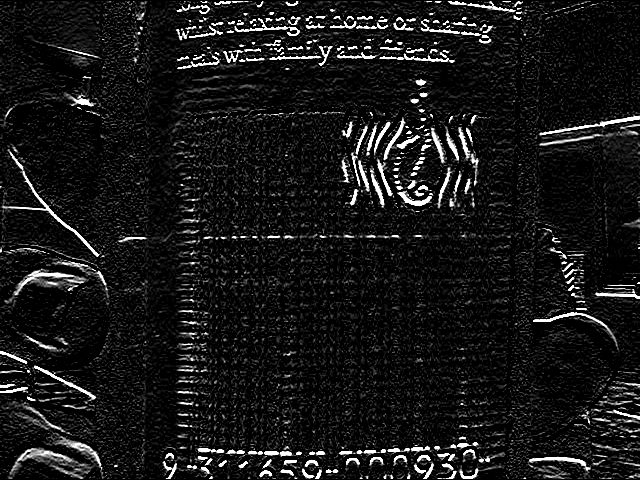

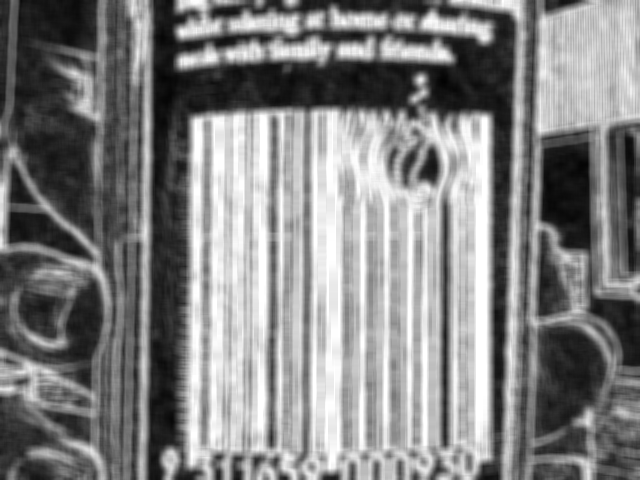

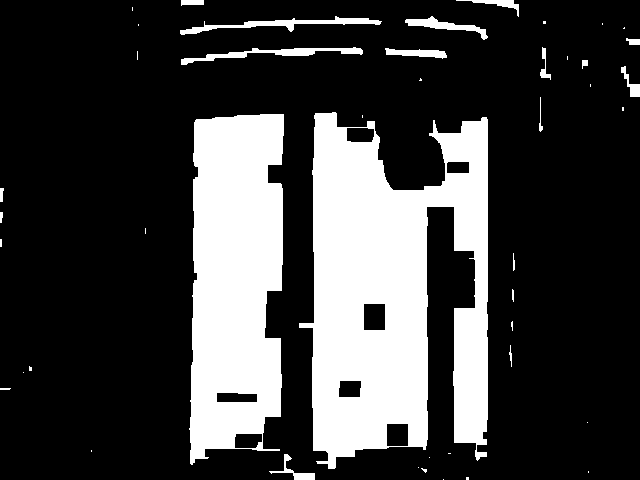

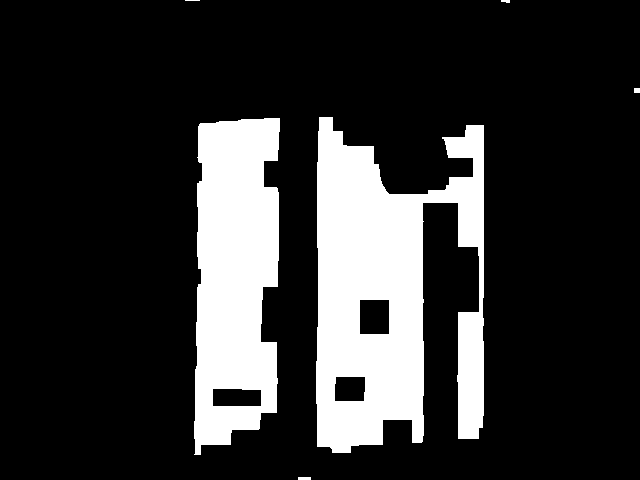

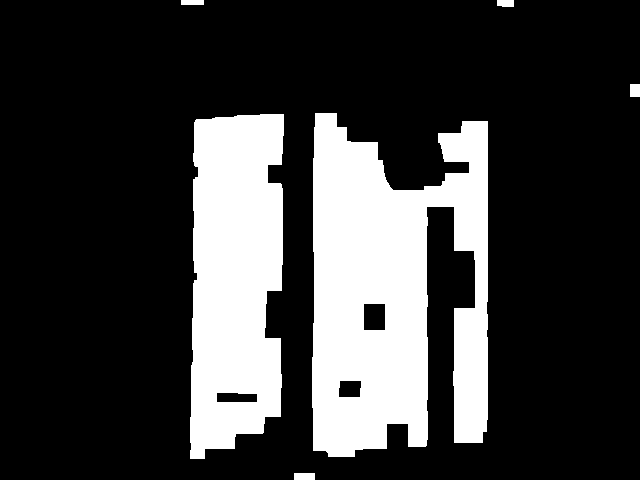

In [ ]:
import numpy as np
import cv2
import imutils
import imageio as iio
img = iio.imread("/content/photo.jpg")
	# convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)
	# compute the Scharr gradient magnitude representation of the images
	# in both the x and y direction using OpenCV 2.4
ddepth = cv2.cv.CV_32F if imutils.is_cv2() else cv2.CV_32F
gradX = cv2.Sobel(gray, ddepth=ddepth, dx=1, dy=0, ksize=-1)
cv2_imshow(gradX)
gradY = cv2.Sobel(gray, ddepth=ddepth, dx=0, dy=1, ksize=-1)
cv2_imshow(gradY)
	# subtract the y-gradient from the x-gradient
gradient = cv2.subtract(gradX, gradY)
gradient = cv2.convertScaleAbs(gradient)
	# blur and threshold the image
blurred = cv2.blur(gradient, (9, 9))
cv2_imshow(blurred)
(_, thresh) = cv2.threshold(blurred, 225, 255, cv2.THRESH_BINARY)
	# construct a closing kernel and apply it to the thresholded image
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 7))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
cv2_imshow(closed)

	# perform a series of erosions and dilations
closed = cv2.erode(closed, None, iterations=4)
cv2_imshow(closed)
closed = cv2.dilate(closed, None, iterations=4)
cv2_imshow(closed)
	# find the contours in the thresholded image
cnts = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
	# if no contours were found, return None
if len(cnts) == 0:
  c=0
	# otherwise, sort the contours by area and compute the rotated
	# bounding box of the largest contour
c = sorted(cnts, key=cv2.contourArea, reverse=True)[0]
rect = cv2.minAreaRect(c)
box = cv2.cv.BoxPoints(rect) if imutils.is_cv2() else cv2.boxPoints(rect)
box = np.int0(box)
	# return the bounding box of the barcode
box
cv2_imshow(box)

In [ ]:
cv2.drawContours(img, [box], -1, (0, 255, 0), 2)
cv2_imshow(img, [box], -1, (0, 255, 0), 2)

TypeError: ignored

In [ ]:
from google.colab.patches import cv2_imshow

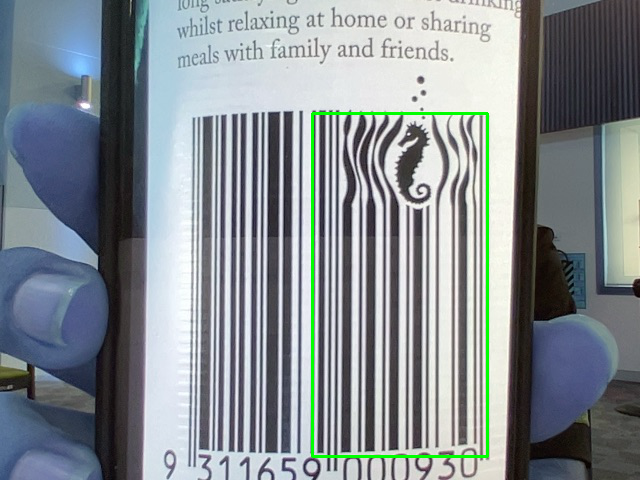

In [ ]:
cv2_imshow(img)

In [ ]:
!pip install pyqrcode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 626 kB/s 
  Created wheel for pyqrcode: filename=PyQRCode-1.2.1-py3-none-any.whl size=36247 sha256=cb3b3db9f3968af1a899557085d503a176eb4e0388d426f7701b9d37d4cfb750
  Stored in directory: /root/.cache/pip/wheels/aa/14/ad/f09824edf35fdc5fd8acc01b60ff57f858f212a2d5c41dddd2
Successfully built pyqrcode


In [ ]:
!apt install libzbar0

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libv4l-0 libv4lconvert0
The following NEW packages will be installed:
  libv4l-0 libv4lconvert0 libzbar0
0 upgraded, 3 newly installed, 0 to remove and 4 not upgraded.
Need to get 193 kB of archives.
After this operation, 760 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libv4lconvert0 amd64 1.14.2-1 [76.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libv4l-0 amd64 1.14.2-1 [41.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libzbar0 amd64 0.10+doc-10.1build2 [75.7 kB]
Fetched 193 kB in 1s (132 kB/s)
Selecting previously unselected package libv4lconvert0:amd64.
(Reading database ... 123942 files and directories current

In [ ]:
!pip install pyzbar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pyzbar
!pip install pyqrcode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
import numpy as np
from pyzbar.pyzbar import decode


In [ ]:
from pyzbar.pyzbar import decode
img = iio.imread("/content/photo.jpg")
barcodes = decode(img)

In [ ]:
for barcode in barcodes:
  x,y,w,h=barcode.rect
  cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),4)
  bdata=barcode.data.decode("utf-8")
  btype=barcode.type
  text=f"{bdata},{btype}"
  cv2.putText(img,text,(x+20,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(100,255,242),2)

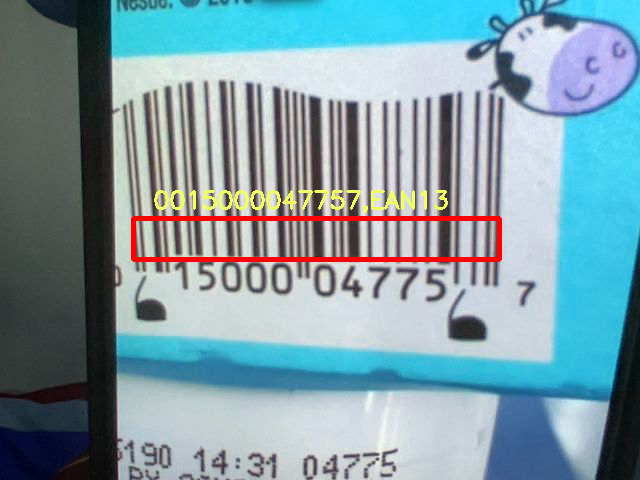

In [ ]:
cv2_imshow(img)
